In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from math import sqrt,log
from os import listdir
from os.path import isfile, join
import pdb
from sklearn import preprocessing

import os.path
import pickle

from scipy.io.arff import loadarff 

import  matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


import utils.auxiliary as utils
from utils.MoSS import MoSS


from utils.quantifierTemplate import apply_quantifier



from sklearn import svm

from copy import deepcopy

from sklearn.linear_model import RidgeClassifier

import xgboost as xgb





In [2]:
#from matplotlib import rc,rcParams
def plot_error_distribution(result, dts_name):
    margin_left = 0.05
    margin_right= 0.99
    margin_top = 0.99
    margin_bottom = .23
    #plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)

    plt_width = 38
    plt_heigth = 18
    #plt.figure(figsize=(plt_width,plt_heigth))

    plot_rotation = 75
    axis_font_size = 50
    #plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
    #plt.yticks(fontsize = axis_font_size)

    labels_size = 60    
    #ax.set_xlabel("Qu


    #print(order2)
    with sns.axes_style("whitegrid"), sns.color_palette('Spectral', result['quantifier'].nunique()):

        #plt.figure(figsize=(38,18))
        plt.figure(figsize=(plt_width,plt_heigth))
        #plt.margins(0.01, tight=True)
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        #plt.subplots_adjust(left=.05, bottom=.23, right=.99, top=.99)
        ax=sns.boxplot(data=result, x='quantifier', y='abs_error') 
        #showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"07"})

        #plt.xticks(rotation =75 ,fontsize = 50)
        #plt.yticks(fontsize = 50)
        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        #ax.set_xlabel("Quantifiers",fontsize=60)
        #ax.set_ylabel("Avg. ranking",fontsize=60)
        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("AE",fontsize=labels_size)
        ax.set_title( "Dataset: "+ dts_name,fontsize=45)

        #plt.legend( bbox_to_anchor=(1.15, 1),loc='upper right')



    #ax.figure.savefig(folder + '/Train_prop_%f'% (train_prop) + 'Test_size %d'% (test_size) + '.png', format="PNG" )
    #ax.figure.savefig(folder + '/Overall_Rank'  + '.pdf', format="PDF" )
    plt.show()

In [3]:
#from matplotlib import rc,rcParams
def plot_rank(result, dts_name):
    margin_left = 0.05
    margin_right= 0.99
    margin_top = 0.99
    margin_bottom = .23
    #plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)

    plt_width = 38
    plt_heigth = 18
    #plt.figure(figsize=(plt_width,plt_heigth))

    plot_rotation = 75
    axis_font_size = 50
    #plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
    #plt.yticks(fontsize = axis_font_size)

    labels_size = 60    
    #ax.set_xlabel("Qu


    #print(order2)
    with sns.axes_style("whitegrid"), sns.color_palette('Spectral', result['quantifier'].nunique()):

        #plt.figure(figsize=(38,18))
        plt.figure(figsize=(plt_width,plt_heigth))
        #plt.margins(0.01, tight=True)
        plt.subplots_adjust(left=margin_left, bottom=margin_bottom, right=margin_right, top=margin_top)
        #plt.subplots_adjust(left=.05, bottom=.23, right=.99, top=.99)
        ax=sns.boxplot(data=result, x='quantifier', y='rank') 
        #showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"07"})

        #plt.xticks(rotation =75 ,fontsize = 50)
        #plt.yticks(fontsize = 50)
        plt.xticks(rotation =plot_rotation ,fontsize = axis_font_size)
        plt.yticks(fontsize = axis_font_size)

        #ax.set_xlabel("Quantifiers",fontsize=60)
        #ax.set_ylabel("Avg. ranking",fontsize=60)
        ax.set_xlabel("Quantifiers",fontsize=labels_size)
        ax.set_ylabel("Rank",fontsize=labels_size)
        #ax.set_title( "Dataset: "+ dts_name,fontsize=45)

        #plt.legend( bbox_to_anchor=(1.15, 1),loc='upper right')



    #ax.figure.savefig(folder + '/Train_prop_%f'% (train_prop) + 'Test_size %d'% (test_size) + '.png', format="PNG" )
    #ax.figure.savefig(folder + '/Overall_Rank'  + '.pdf', format="PDF" )
    plt.show()

### Plotting some scores with MoSS

In [4]:
#p_scores, n_scores, scores = MoSS(1000,0.5,0.1)
#sns.displot(scores, kind="kde", fill=True, x='score', hue="label")

In [5]:
def load_and_fit_quantifiers_SCH(l_trained_qnt, list_sch, X_train, y_train):
    
    if l_trained_qnt is not None:
        for qnt in list_sch:
            counter = str.split(qnt, 'SCH_')[1]            
            if counter not in [ co['counter'] for co in l_trained_qnt]:                
                qnt_sch = utils.fit_quantifier_schumacher_github(counter, X_train, y_train)
                l_trained_qnt.append({"counter":counter, "model": qnt_sch})
        return l_trained_qnt
    else:
        for qnt in list_sch:
            counter = str.split(qnt, 'SCH_')[1]            
            qnt_sch = utils.fit_quantifier_schumacher_github(counter, X_train, y_train)
            l_trained_qnt.append({"counter":counter, "model": qnt_sch})
        return l_trained_qnt
        

In [6]:
def load_and_fit_quantifiers(X_train, y_train, allow_proba, dts_name, model_str, n_classes):
  if os.path.isfile('./models_scores/'+dts_name+'/'+model_str+'_models.sav') is False:
    models = []
    l_scores = []
    l_train = []
    l_ytrain= []
    lbin = preprocessing.LabelBinarizer()
    y_bin = lbin.fit_transform(y_train)
    for ci in range(0,len(n_classes)):      
      clf.fit(X_train, y_bin[:,ci])
      models.append(deepcopy(clf))
      l_scores.append(utils.getScores(X_train, y_bin[:,ci], 10, clf, allow_proba))
      l_train.append(X_train)
      l_ytrain.append(y_bin[:,ci])      

    pickle.dump(models, open('./models_scores/'+dts_name+'/'+model_str+'_models.sav', 'wb')) # Loading fitted models
    pickle.dump(l_scores, open('./models_scores/'+dts_name+'/'+model_str+'_l_scores.sav', 'wb')) # Loading scores
    pickle.dump(l_train, open('./models_scores/'+dts_name+'/l_train.sav', 'wb')) # Loading training partition
    pickle.dump(l_ytrain, open('./models_scores/'+dts_name+'/l_ytrain.sav', 'wb')) # Loading labels from training partition
  else:
    models = pickle.load(open('./models_scores/'+dts_name+'/'+model_str+'_models.sav', 'rb'))
    l_scores = pickle.load(open('./models_scores/'+dts_name+'/'+model_str+'_l_scores.sav', 'rb'))
    l_train = pickle.load(open('./models_scores/'+dts_name+'/l_train.sav', 'rb'))
    l_ytrain = pickle.load(open('./models_scores/'+dts_name+'/l_ytrain.sav', 'rb')) 

  return models, l_scores, l_train, l_ytrain   

# Experiment

In [7]:
"""This function run all quantifiers defined in counters parameter over a given dataset (defined by dts_name parameter).
 
Parameters
----------
X_train : array
    An array of the training data.
X_test : array
    An array of the test data.
y_train : array
    An array with the training labels.
y_test : array
    An array with the test labels.
dts_name : string
    Dataset name
counters : list
    A list of quantifiers name
clf: object
    Classifier model
Returns
-------
object
    the quantifier fitted. 
 """

def run_expereiment(X_train, X_test, y_train, y_test, dts_name, counters, clf):
  
  #>>>>>>>..............Experimental_setup............>>>>>>>>>>
  models_names = ['RidgeClassifier', 'RandomForestClassifier', 'XGBClassifier','SVC']
  vdist = ["topsoe", "jensen_difference", "prob_symm", "ord", "sord", "hellinger"] 
  names_vdist = ["TS", "JD", "PS", "ORD", "SORD", "HD"] 
  measure     = "topsoe"                   #default measure for DyS
  
  
  niterations = 10
  alpha_values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
  batch_sizes = [50] 
  #>>>>>>>..............Experimental_setup............>>>>>>>>>>

  n_classes = np.sort(np.int0(np.unique(y_train)))
  print(n_classes)
  y_test = y_test.astype(int)

  model_str = [x in str(type(clf)) for x in models_names]
  model_str = models_names[np.where(model_str)[0][0]]
  allow_proba = model_str in models_names[:-1]

  # BEGIN - Load fitted quantifiers or fit them. Finally save them (NOTE: only for T. Schumacher codes)
  list_sch = [match for match in counters if "SCH_" in match]  
  if len(list_sch) > 0:
    l_qnt_sch = []
    if os.path.isfile('./models_scores/'+dts_name+'/'+ model_str+'_sch_models.sav') is True:
        l_qnt_sch = pickle.load(open('./models_scores/'+dts_name+'/'+ model_str+'_sch_models.sav', 'rb'))
    l_qnt_sch = load_and_fit_quantifiers_SCH(l_qnt_sch, list_sch, X_train, y_train)
    pickle.dump(l_qnt_sch, open('./models_scores/'+dts_name+'/'+ model_str+'_sch_models.sav', 'wb'))
  # END - Load fitted quantifiers or fit them    
  
  #BEGIN - OVR (NOTE: it does not include any T. Schumacher code)
  models, l_scores, l_train, l_ytrain = load_and_fit_quantifiers(X_train, y_train, allow_proba, dts_name, model_str, n_classes)  
     
  result = pd.DataFrame()   
    
  for sample_size in batch_sizes:   #[10,100,500], batch_sizes, Varying test set sizes 
    for cl in n_classes:
      for alpha in alpha_values: 
        print(str(cl) + ' - ' +str(alpha))       
        for iter in range(niterations):
          # NOTE: get_batch function requires some improvements. It gets a sample from test partition, taking
          # cl as positive class with alpha distribution. The remaining classes have their distribution
          # randomly sampled
          sample_test, _, prop_actual = utils.get_batch(cl, alpha, X_test, y_test, sample_size) 

          for co in counters:
            auxi = co.split('_')
            quantifier = co
            # Running Schumacher methods
            if len(auxi) > 1:
                auxi = auxi[1]
                l_i_sch = [x['counter']==auxi for x in l_qnt_sch]
                l_qnt_i = np.where(np.array(l_i_sch)== True)[0][0]
                pred_dist = utils.predict_quantifier_schumacher_github(l_qnt_sch[l_qnt_i]['model'], sample_test)  
            else:
                # Running our methods
                aux = co.split("-")
                pred_dist = []
                # Selecting the measure (topsoe, hellinger, etc)
                if len(aux) > 1:
                    quantifier = aux[0]
                    measure = vdist[names_vdist.index(aux[1])]
                # Performeing OVR scheme
                for i in range(0, len(models)):
                    clf = models[i]
                    scores = deepcopy(l_scores[i])                     
                    
                    # Classifiers that provides the probabilities of each sample
                    if allow_proba:
                        te_scores = clf.predict_proba(sample_test)[:,1]  #estimating test sample scores                
                    else:
                        # SVC()
                        te_scores = clf.decision_function(sample_test)  #estimating test sample scores 
                        if 'aMoSS' in quantifier:
                            if (min(scores.score) > 0):  
                                scores.score = scores.score - min(scores.score)
                            else:
                                scores.score = scores.score + abs(min(scores.score))                      

                    tprfpr = utils.getTPRandFPRbyThreshold(scores)           
                    pos_scores = scores[scores['label']==1]['score']
                    neg_scores = scores[scores['label']==0]['score']
                    u_p = np.mean(pos_scores)
                    u_n = np.mean(neg_scores)

                    #.............Calling of Methods..................................................  
                    pred_pos_prop = apply_quantifier(qntMethod = quantifier, p_score = pos_scores, n_score = neg_scores, test_score = te_scores, 
                                                    TprFpr = tprfpr, thr = np.round(np.median(tprfpr['threshold']),1), measure = measure, calib_clf = None, 
                                                    X_test = sample_test, u_p = u_p, u_n = u_n, adj_score=allow_proba)         
                
                    pred_pos_prop = round(pred_pos_prop,2)  #predicted class proportion
                    pred_dist.append(pred_pos_prop)                 
                
              #..............................RESULTS Evaluation.....................................
                aux_sum = np.sum(pred_dist)
                if aux_sum != 0.0:
                    pred_dist = pred_dist/aux_sum


            pred_dist = np.round(pred_dist, 3)            
            error = np.round(np.sum(abs(pred_dist - prop_actual)),3)
            line_result = pd.concat([pd.DataFrame([model_str,sample_size, error, quantifier, dts_name]).T, pd.DataFrame(np.array(prop_actual)).T, pd.DataFrame(np.array(pred_dist)).T], axis=1)

            result = pd.concat([result, line_result], axis=0)

    co_names = ["scorer","Test_size","abs_error","quantifier", "dataset"]
    co_actual = ["actual_c."+ str(x) for x in np.unique(n_classes)]
    co_pred = ["pred_c."+ str(x) for x in np.unique(n_classes)]
    co_names.extend(co_actual)
    co_names.extend(co_pred) 

    result.columns = co_names  

  return result

# Main

In [8]:
def run(dt, clf, counters):

  print(dt)
  models = None
  scorer_name = str.split(str.split(str(type(clf)), '.')[-1],"'")[0]
  if os.path.isfile('./models_scores/'+dt+'/'+scorer_name+'_result.csv') is True:
    #if os.path.isfile('./models_scores/'+dt+'/models.sav'):
    #  models = 1
    
    df_data = utils.load_data(path="./data/", dts=dt)
    X = np.array(df_data.drop(['label'], axis=1))
    #y = np.int0(df_data['Class'])
    y = np.array(df_data['label'])
    #y = y.astype('category')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)
    mo = run_expereiment(X_train, X_test, y_train, y_test, dt, counters, clf)
    #mo_ant = pd.read_csv('./models_scores/'+dt+'/resultv6.csv')
    #mo_ant = mo_ant.drop(mo_ant[mo_ant.quantifier=='DySyn'].index)
    #mo_ant = mo_ant.drop(mo_ant[mo_ant.quantifier=='DySyn+aMoSS'].index)

    #return mo, sc
    #mo = pd.concat([mo, mo_ant], axis=0)
    
    mo.to_csv('./models_scores/'+dt+'/'+scorer_name+'_result.csv')

    #plot_error_distribution(mo, dt)


In [ ]:
# multiclass datasets: 
dts = ['nursery', 'turk_student_eval', 'yeast', "drugs", 'wine','concrete', 'skillcraft', 'energy', 'news_popularity',"video_game_sales"]

# Quantification methods:
counters = ['DySyn','DyS-TS','DySyn+aMoSS','SCH_AC', 'SCH_GPAC', 'SCH_DyS', 'SCH_CC', 'SCH_MS', 'SCH_EM']#['DySyn','DySyn+aMoSS','DyS-TS', 'SCH_GPAC', 'SCH_DyS']

# Please, choose a base classifier
#clf = svm.SVC()
#clf = RandomForestClassifier(n_estimators=1000)
clf = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

for dti in dts:
    run(dti, clf, counters)

# Result
The following script binds the results for each dataset and calculates the ranking between all quantifiers

In [ ]:
dts = ["drugs",'wine',"video_game_sales", 'concrete', 'skillcraft', 'energy', 'news_popularity', 'nursery', 'turk_student_eval', 'yeast']
all_results = pd.DataFrame()

base_clf = 'RandomForestClassifier'
base_clf = 'SVC'
base_clf = 'XGBClassifier'


for dt in dts:
  print(dt)
  models = None
  if os.path.isfile('./models_scores/'+dt+'/'+base_clf+'_result.csv') is True:
    aux = pd.read_csv('./models_scores/'+dt+'/'+base_clf+'_result.csv')
    #aux2 = pd.read_csv('./models_scores/'+dt+'/resultv8.csv')
    #aux2 = aux2.drop(aux2[aux2.quantifier=='SCH_GPAC'].index)
    #aux = pd.concat([aux, aux2], axis=0)
    
    aux = aux[["Test_size","abs_error", "quantifier","dataset"]]    
    g = aux.groupby('quantifier')[['quantifier', 'abs_error', 'dataset']].mean().reset_index()

    rk = g.abs_error.rank()
    #g = g.drop(['abs_error'], axis=1)
    g['rank'] = rk
    all_results = pd.concat([all_results, g], axis=0)
    
    #re.to_csv('./models_scores/'+dt+"/result_new.csv")

    #plot_error_distribution(mo, dt)


## Ranking

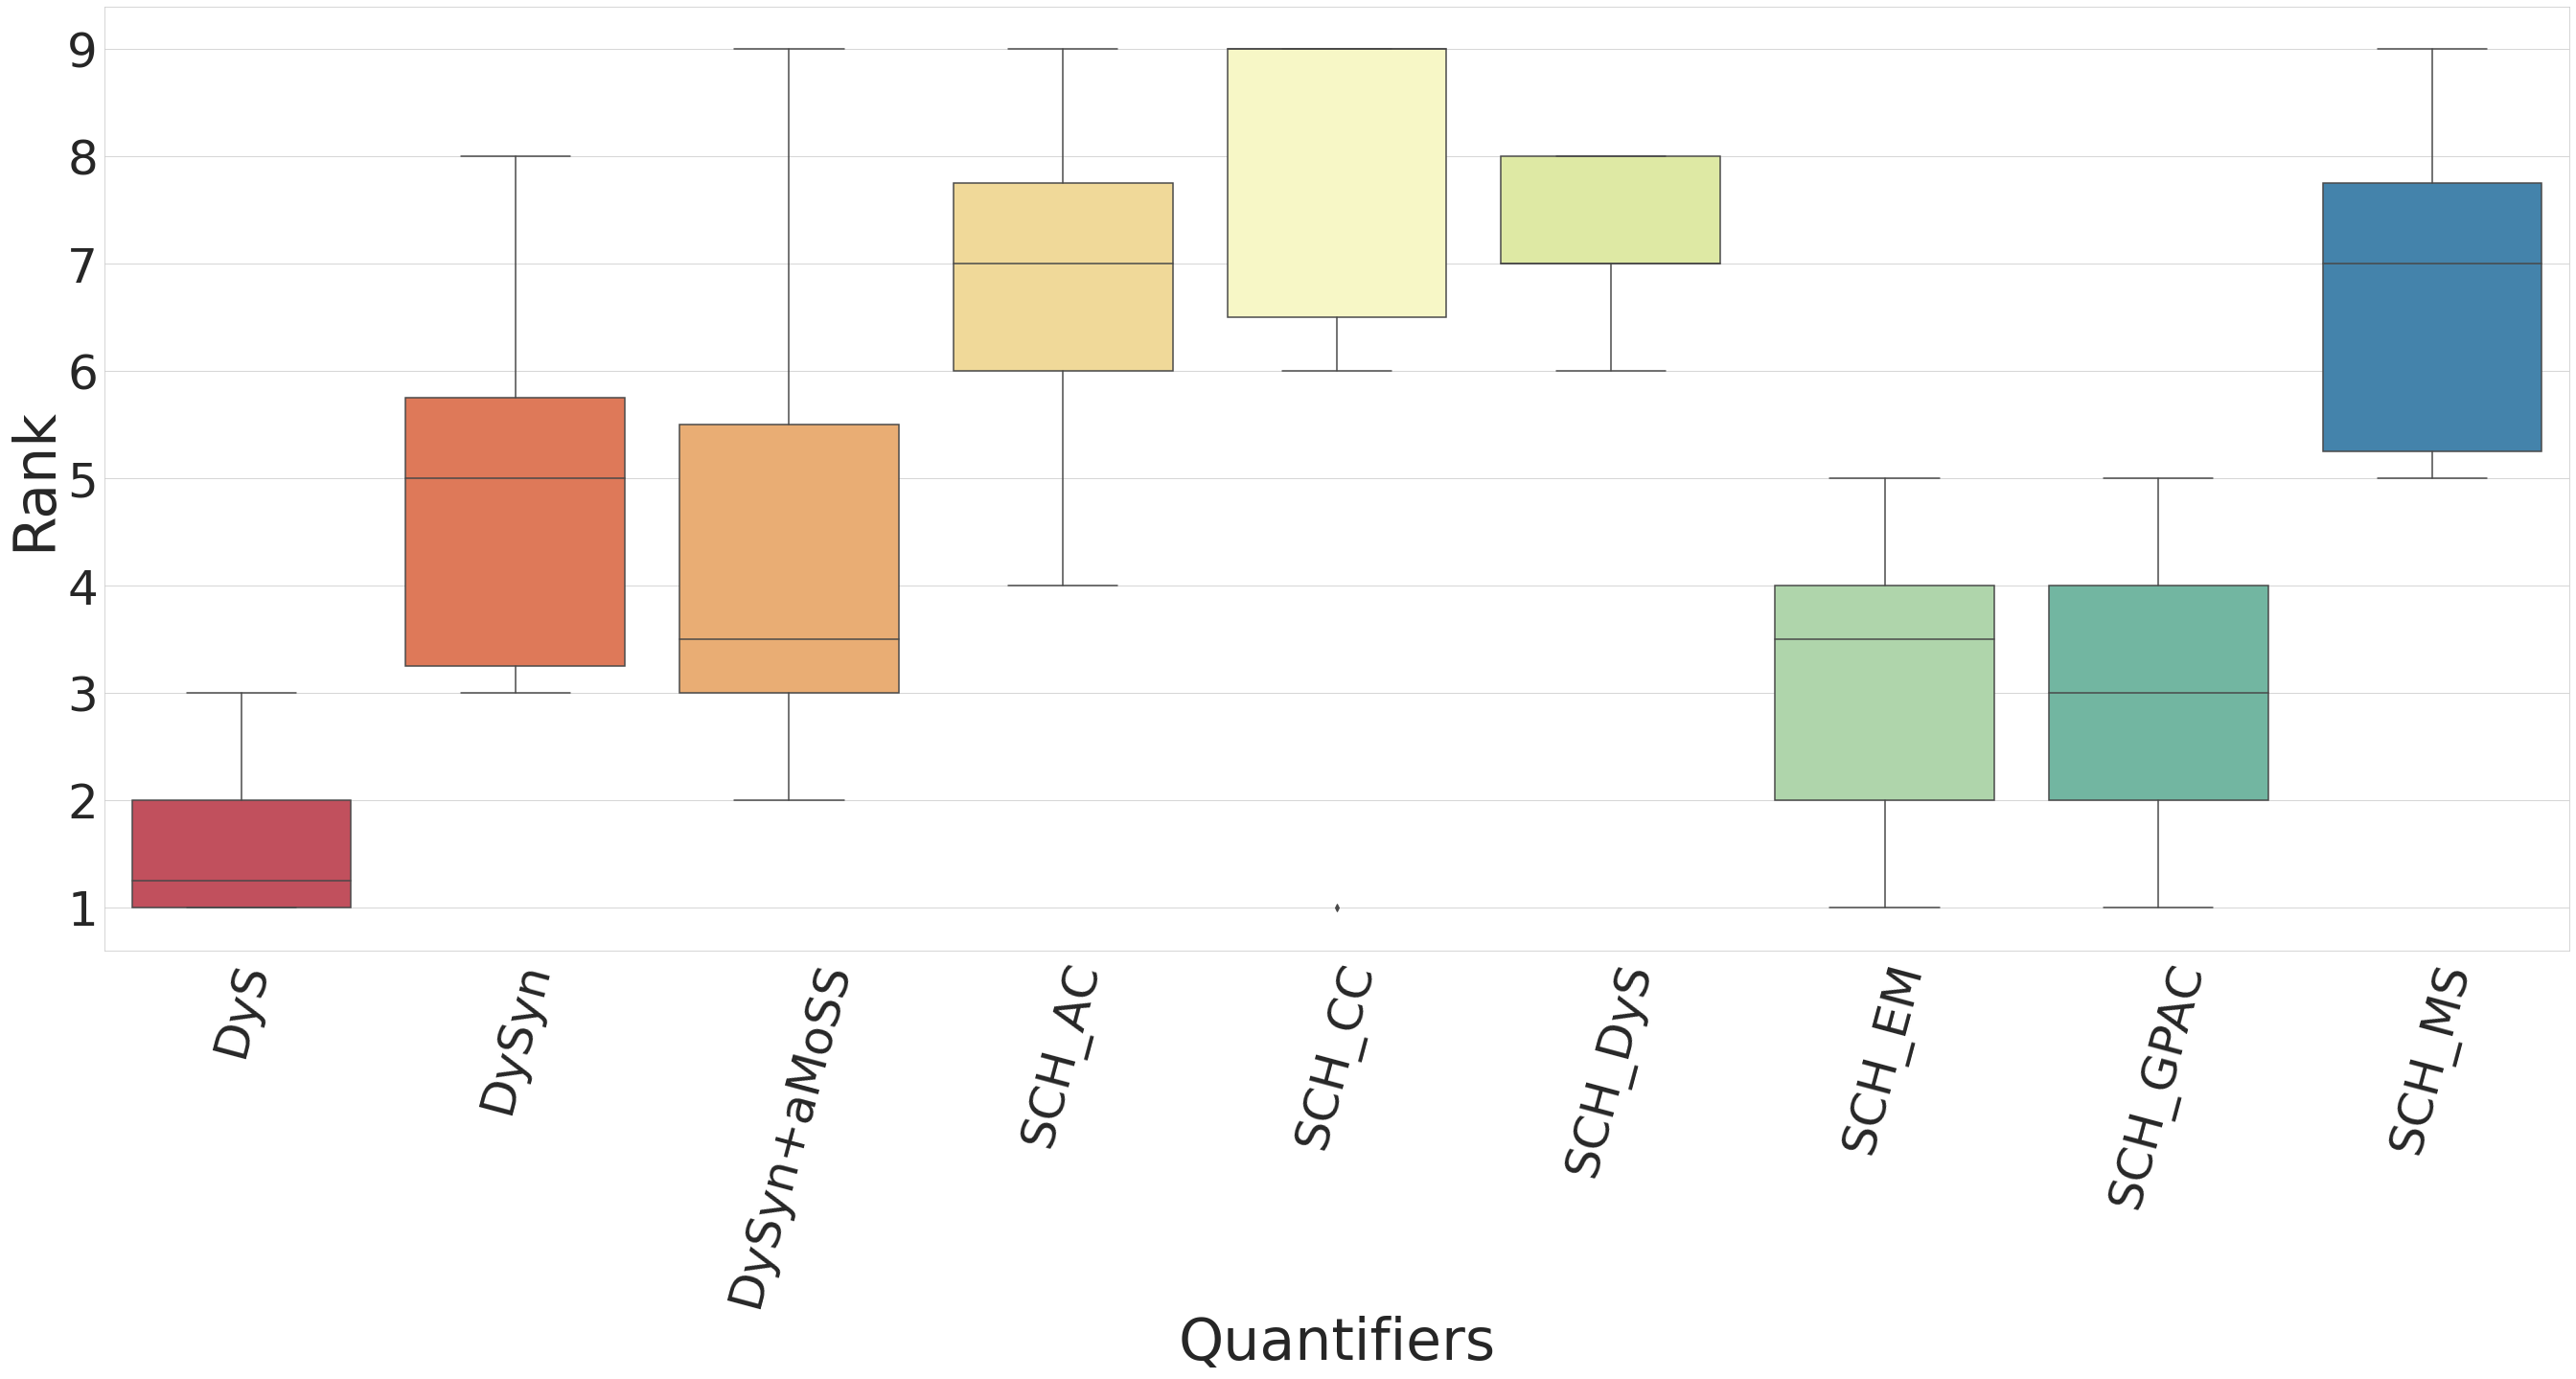

In [17]:
plot_rank(all_results, '')

## AE
The following plot shows the AE for a given dataset over all quantifiers tested.

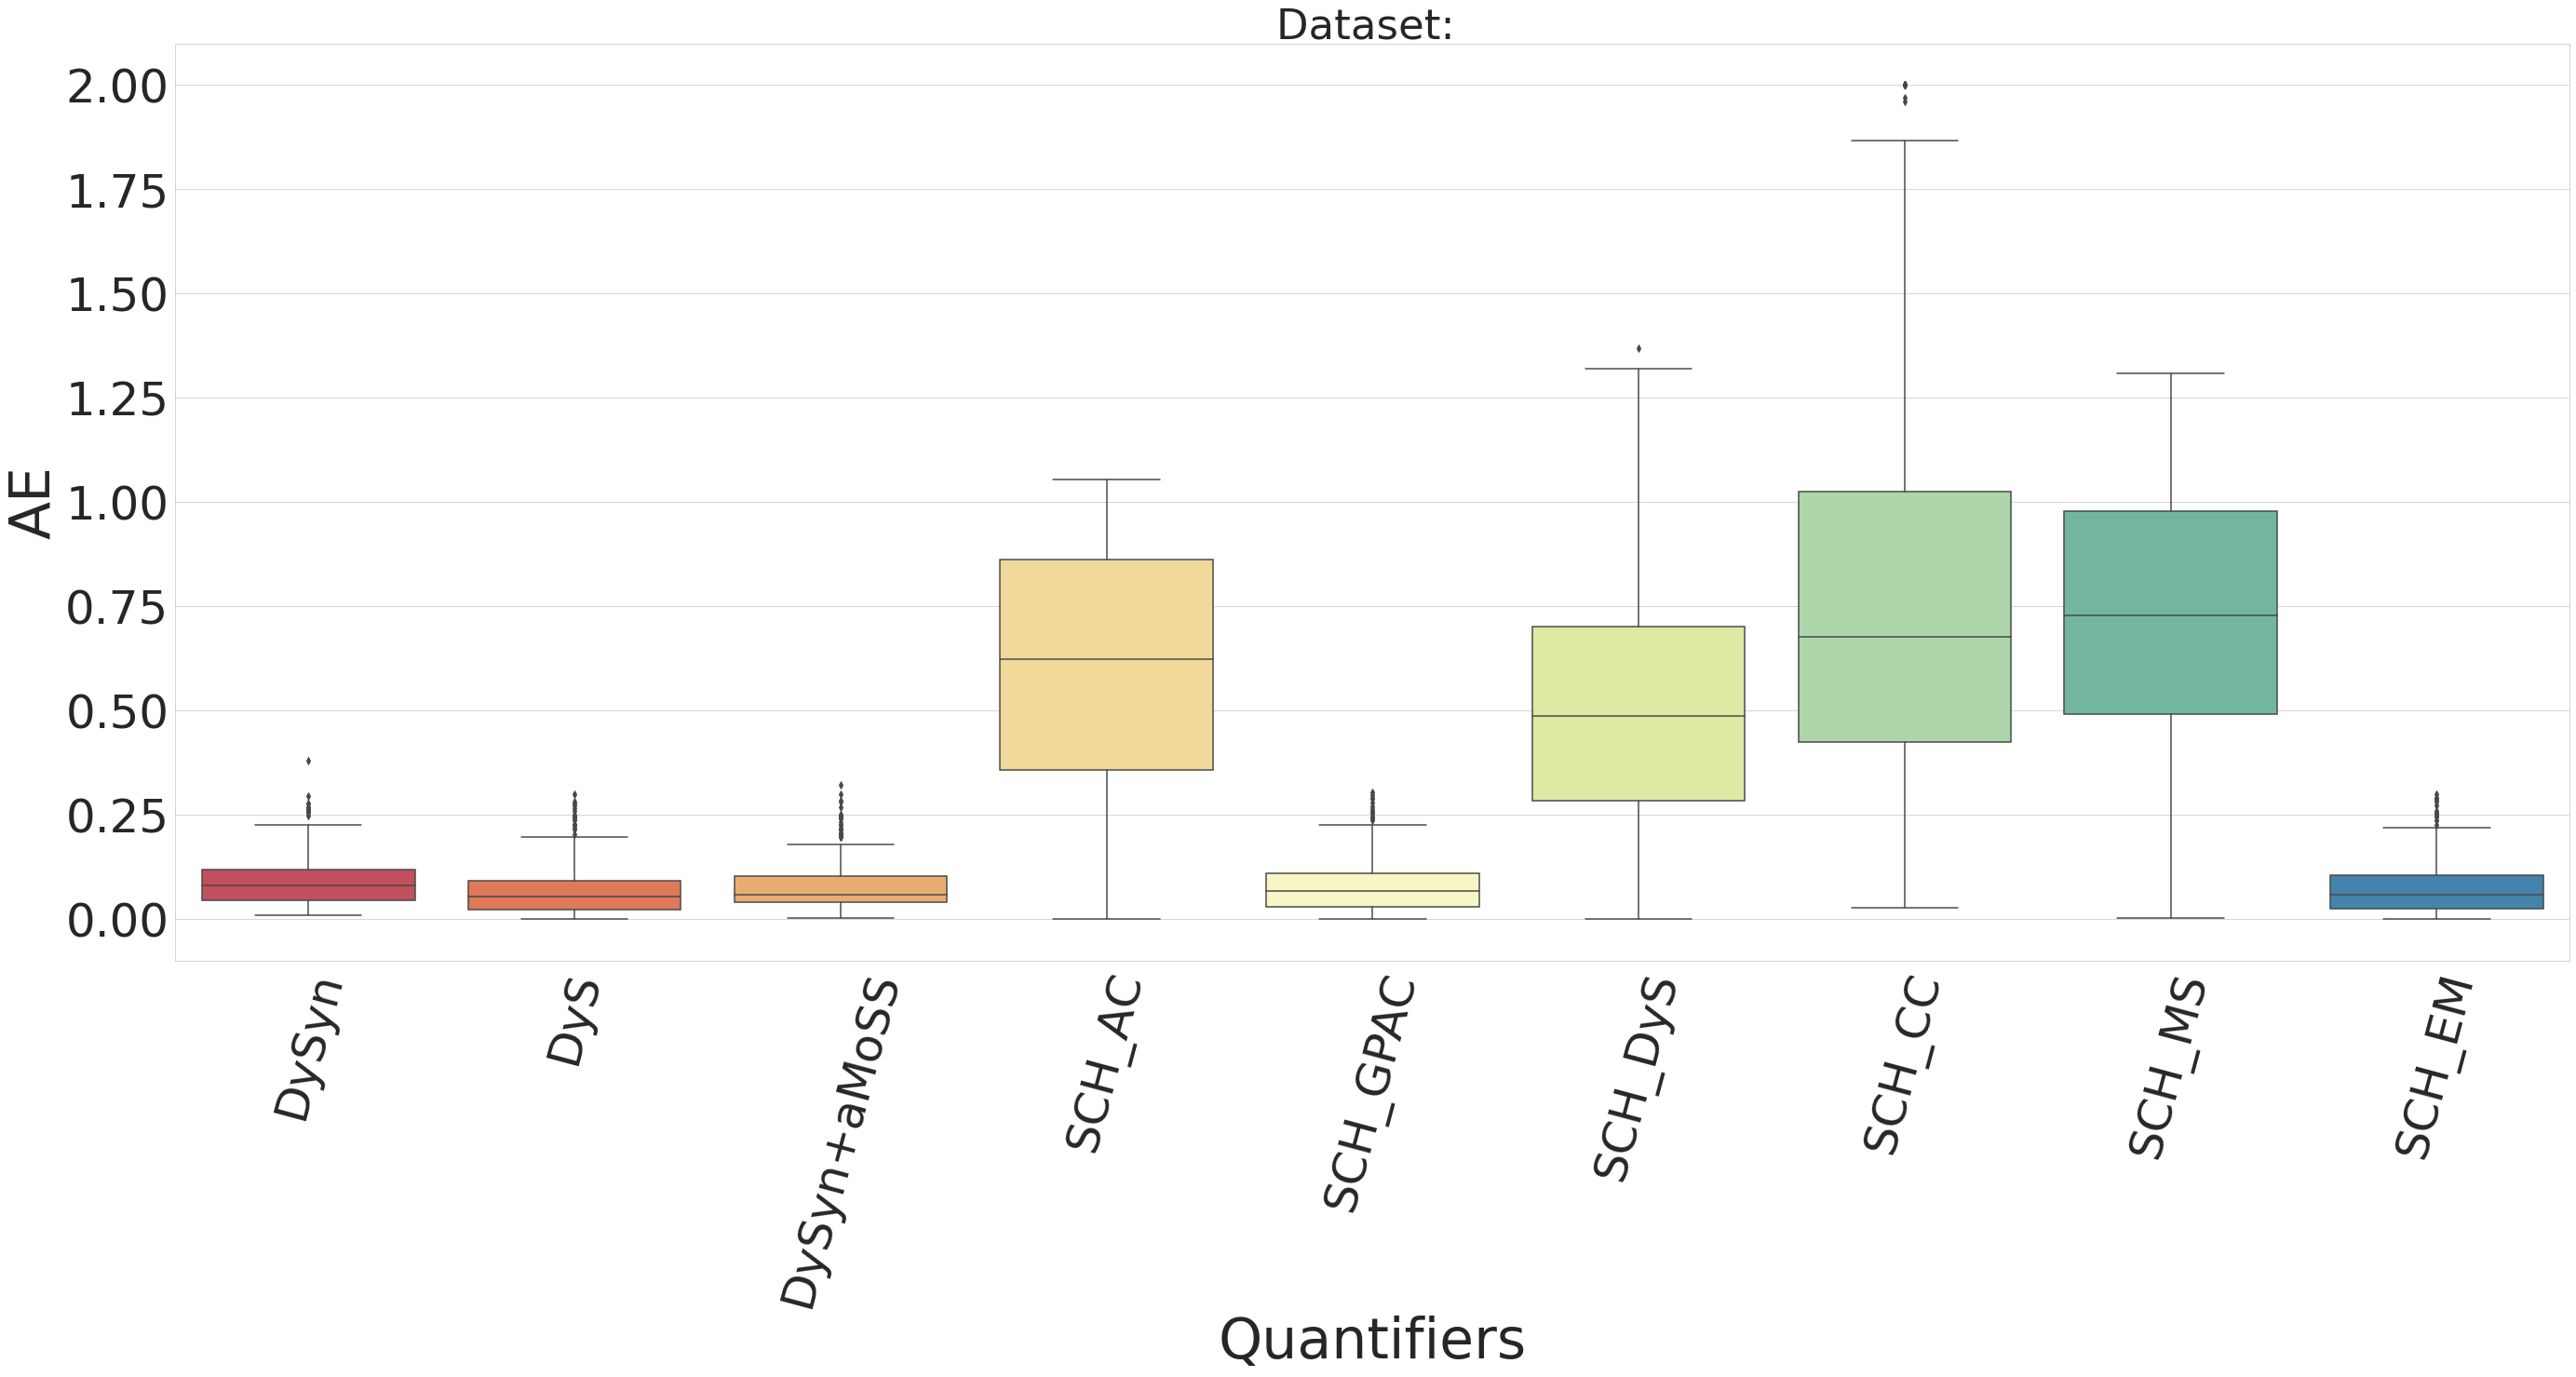

In [19]:
dataset = 'concrete' # It should be the same named of any subfolder of models_scores folder
base_clf = 'XGBClassifier'

re = pd.read_csv('./models_scores/'+dataset +'/'+base_clf+'_result.csv')
plot_error_distribution(re, '')